<IPython.core.display.Javascript object>


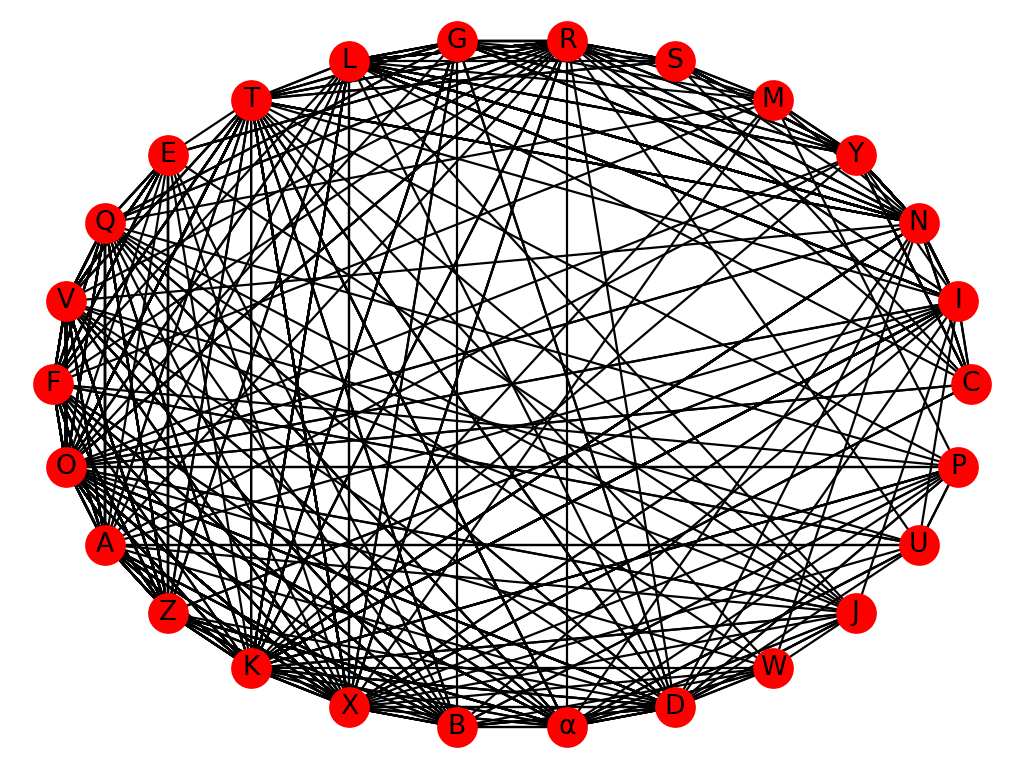

The average shortest path length is:
1.403076923076923
The diameter is:
2
The radius is:
2
The eccentricities are:
{'C': 2, 'I': 2, 'N': 2, 'Y': 2, 'M': 2, 'S': 2, 'R': 2, 'G': 2, 'L': 2, 'T': 2, 'E': 2, 'Q': 2, 'V': 2, 'F': 2, 'O': 2, 'A': 2, 'Z': 2, 'K': 2, 'X': 2, 'B': 2, 'α': 2, 'D': 2, 'W': 2, 'J': 2, 'U': 2, 'P': 2}
The peripheries are:
['C', 'I', 'N', 'Y', 'M', 'S', 'R', 'G', 'L', 'T', 'E', 'Q', 'V', 'F', 'O', 'A', 'Z', 'K', 'X', 'B', 'α', 'D', 'W', 'J', 'U', 'P']
The centers are:
['C', 'I', 'N', 'Y', 'M', 'S', 'R', 'G', 'L', 'T', 'E', 'Q', 'V', 'F', 'O', 'A', 'Z', 'K', 'X', 'B', 'α', 'D', 'W', 'J', 'U', 'P']
The degree centralities are:
{'C': 0.76, 'I': 2.32, 'N': 21.36, 'Y': 17.0, 'M': 0.72, 'S': 4.16, 'R': 2.56, 'G': 1.68, 'L': 5.04, 'T': 4.32, 'E': 2.48, 'Q': 2.72, 'V': 10.96, 'F': 4.08, 'O': 8.32, 'A': 3.7600000000000002, 'Z': 5.36, 'K': 3.68, 'X': 4.72, 'B': 1.68, 'α': 2.32, 'D': 2.16, 'W': 0.48, 'J': 0.72, 'U': 0.56, 'P': 0.8}
The betweenness centralities are:
{'C': 0.002

In [12]:
import xlrd # This module helps read data from Excel file
import networkx as nx
import numpy as np
import pandas as pd
import xlsxwriter # for writing data to Excel file

%matplotlib notebook


THRESHOLD_BASED_ON = 'edges' # 'edges' or 'nodes'
THRESHOLD_VALUE = 30
MULTI_EDGE_DISPLAY = False 

# read data from Excel file from local addres
loc = ("Se 2013 Oct Cluster-node list .xlsx")
workbookToRead = xlrd.open_workbook(loc)

#get information of edges from the
def numberToLetter(num):
    if num == 27:
        return 'α'
    elif num >= 1 and num <= 26:
        return chr(num + 64)
        
def getEdge(startMinute):
    sheet = workbookToRead.sheet_by_index(0) #the index of sheet
    startVerticeNum = int(sheet.cell_value(startMinute, 2)) #(row, column) Python starts a list with 0
    endVerticeNum = int(sheet.cell_value(startMinute+1, 2)) 
    startVertice = numberToLetter(startVerticeNum)
    endVertice = numberToLetter(endVerticeNum)
    return (startVertice, endVertice) # Return the edge. Convert numbers to int, which looks better

# Instantiate the graph
G1 = nx.MultiGraph() # Allow self-loop

# add node/edge pairs
i = 0
while i < 1434: # exhaust the whole spreadsheet
    edge = getEdge(i)
    G1.add_edge(edge[0], edge[1])
    i += 1
#Write to dot file #########################################  
def addToDict(key, dict1):
    if key in dict1:
        dict1[key] += 1
    else:
        dict1[key] = 1

    
f = open("test.dot","w+")
f.write("digraph fig1 {\n")
f.write("	layout=circo\n")

#f.write("	A -> B;\n")
j = 0
listOfAddedEdges = []
dictOfEdges = {}
dictOfNodes = {}
while j < 1434: # exhaust the whole spreadsheet
    edge = getEdge(j)
    start = edge[0]
    end = edge[1]
    if THRESHOLD_BASED_ON == 'nodes':
        if j == 0:
            dictOfNodes[start] = 1
            dictOfNodes[end] = 1
        else:
            addToDict(end, dictOfNodes)
            if dictOfNodes[start] >= THRESHOLD_VALUE and dictOfNodes[end] >= THRESHOLD_VALUE:
                # add edge
                text = "	" + start + " -> " + end + " ;\n"
                if MULTI_EDGE_DISPLAY == True:    
                    f.write(text)
                elif MULTI_EDGE_DISPLAY == False:
                    if not text in listOfAddedEdges:
                        listOfAddedEdges.append(text)
                        f.write(text)     
    elif THRESHOLD_BASED_ON == 'edges':
        addToDict(edge, dictOfEdges)
        if dictOfEdges[edge] >= THRESHOLD_VALUE:
            # add edge  
            text = "	" + start + " -> " + end + " ;\n"
            if MULTI_EDGE_DISPLAY == True:    
                f.write(text)
            elif MULTI_EDGE_DISPLAY == False:
                if not text in listOfAddedEdges:
                    listOfAddedEdges.append(text)
                    f.write(text)  
    j += 1
    

f.write("}")
f.close() 
#Write to dot file end#########################################  

#draw the network G1
nx.draw_circular(G1,with_labels=True)

#Print the measurments of the network
averageShortestPathLength = nx.average_shortest_path_length(G1)
print ("The average shortest path length is:")
print(averageShortestPathLength)

diameter = nx.diameter(G1)
print ("The diameter is:")
print(diameter)

radius = nx.radius(G1)
print ("The radius is:")
print(radius)

eccentricities = nx.eccentricity(G1)
print ("The eccentricities are:")
print(eccentricities)

peripheries = nx.periphery(G1)
print ("The peripheries are:")
print(peripheries)

centers = nx.center(G1)
print ("The centers are:")
print(centers)

dCentralities = nx.degree_centrality(G1) # a dictionary of centralities
#dCentralityMax = max(zip(dCentralities.values(), dCentralities.keys()))
print ("The degree centralities are:")
print (dCentralities)


bCntralities = nx.betweenness_centrality(G1) # a dictionary of centralities
#bCentralityMax = max(zip(bCntralities.values(), bCntralities.keys()))
print ("The betweenness centralities are:")
print (bCntralities)

cCntralities = nx.closeness_centrality(G1)
print ("The closeness centralities are:")
print (cCntralities)

NumNodesToRemove = nx.node_connectivity(G1)
print ("The number of nodes to be removed to disconnect this network:")
print (NumNodesToRemove)

nToRemove = nx.minimum_node_cut(G1)
print ("Which notes to be removed?")
print (nToRemove)

NumEdgesToRemove = nx.edge_connectivity(G1)
print ("The number of edges to be removed to disconnect this network:")
print (NumEdgesToRemove)

eToRemove = nx.minimum_edge_cut(G1)
print ("Which edges to be removed?")
print (eToRemove)

#Write results to Excel file

# Write a list to specific location
def writeListToExcel(listToWrite,startRow=0,startCol=0):
    row = startRow
    for i in listToWrite:
        worksheet.write(row, startCol, i)
        row += 1
        
# Write a dictinary to specific location
def writeDictToExcel(dictToWrite,startRow=0,startCol=0):
    row = startRow
    keyCol = startCol # This column shows the keys.
    valCol = startCol + 1 # This column shows the values. 
    for key, value in dictToWrite.items():
        worksheet.write(row, keyCol, key)
        worksheet.write(row, valCol, value)
        row += 1
        
# Write a tow-layer list which is used to specify a set of edges
def writeEdgeListToExcel(listToWrite,startRow=0,startCol=0):
    row = startRow
    tailCol = startCol # This column shows the tail nodes.
    headCol = startCol + 1 # This column shows the head nodes.
    for i in listToWrite:
        tailNode = i[0]
        headNode = i[1]
        worksheet.write(row, tailCol, tailNode)
        worksheet.write(row, headCol, headNode)
        row += 1

workbook = xlsxwriter.Workbook('Results.xlsx')
worksheet = workbook.add_worksheet('Overall')

worksheet.write('A1','Average Length')
worksheet.write('A2',averageShortestPathLength)

worksheet.write('B1','Diameter')
worksheet.write('B2',diameter)

worksheet.write('C1','Radius')
worksheet.write('C2',radius)

worksheet.write('D1','NumNodesRm')
worksheet.write('D2',NumNodesToRemove)

worksheet.write('E1','NodesToRm')
writeListToExcel(nToRemove, 1, 4)

worksheet.write('F1','NumEdgesRm')
worksheet.write('F2',NumEdgesToRemove)

worksheet.write('G1','EdgesToRm')
writeEdgeListToExcel(eToRemove, 1, 6)


#New sheet of eccentricities
worksheet = workbook.add_worksheet('Eccentricities')

worksheet.write('A1','Node')
worksheet.write('B1','Eccentricity')
writeDictToExcel(eccentricities, 1, 0)

worksheet.write('D1','Periphery')
writeListToExcel(peripheries, 1, 3)

worksheet.write('E1','Center')
writeListToExcel(centers, 1, 4)

#New sheet of centralities
worksheet = workbook.add_worksheet('Centralities')

worksheet.write('A1','Node')
worksheet.write('B1','Degree')
writeDictToExcel(dCentralities, 1, 0)

worksheet.write('D1','Node')
worksheet.write('E1','Betweenness')
writeDictToExcel(bCntralities, 1, 3)

worksheet.write('G1','Node')
worksheet.write('H1','Closeness')
writeDictToExcel(cCntralities, 1, 6)

#????
